In [1]:
# Name : Yogyata Chaubey
# Data Science Intern
# The Spark Foundation 

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\Archana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reading data from remote link
url ="http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(12)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


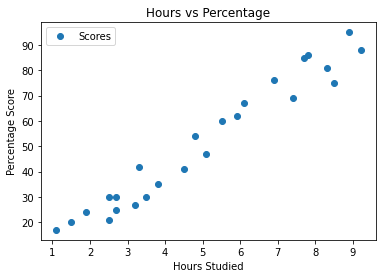

In [7]:
# Data Visualization
# Plotting the Distribution of score
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
# we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [9]:
# Linear Regression Model
# Preparing the data

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
# Training the model

from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

In [13]:
# Training the Algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


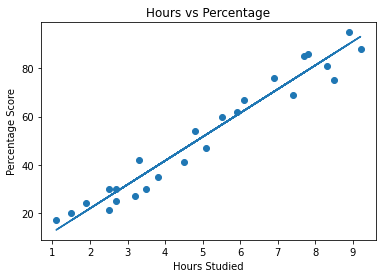

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [15]:
# Checking the accuracy scores for Training and test set

print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
y_predict

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [18]:
y_predict[:5]

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217])

In [19]:
data1= pd.DataFrame({'Actual': y_test,'Predicted': y_predict[:5]})
data1

,Actual,Predicted
0,20,39.678655
1,27,20.848407
2,69,79.321281
3,30,70.401690
4,62,12.919882


In [20]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


In [21]:
# Model Evaluation Metrics
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test, y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)


Mean Squred Error: 914.5549752244242
Mean absolute Error: 25.126667098277874
